# importing the libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np

# machine learning library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [ ]:
%cd '/content/drive/MyDrive'

/content/drive/MyDrive


# reading the data 

<b> Defining the columns that we are going to use and seperating them based on their types </b> 

In [ ]:
primary_key = ['RESTAURANT_SERIAL_NUMBER']
nominal_features = ['RESTAURANT_CATEGORY','CITY','STATE','INSPECTION_TYPE', 'FIRST_VIOLATION_TYPE',
       'SECOND_VIOLATION_TYPE', 'THIRD_VIOLATION_TYPE',]
ordinal_features = ['CURRENT_GRADE']
numerical_features = ['CURRENT_DEMERITS', 'EMPLOYEE_COUNT', 'INSPECTION_DEMERITS','NUMBER_OF_VIOLATIONS','FIRST_VIOLATION','SECOND_VIOLATION', 'THIRD_VIOLATION']
continuous_features = ['MEDIAN_EMPLOYEE_AGE', 'MEDIAN_EMPLOYEE_TENURE',]
target_feature = ['NEXT_INSPECTION_GRADE_C_OR_BELOW']
categorical_features = nominal_features + ordinal_features
all_columns = primary_key + categorical_features + numerical_features + continuous_features + target_feature

Loading the training and testing data.<br>
Also adding additional column of the target variable as test set doesn't have that. <br>
We are also specifying if a tuple is training or testing for seperating them after preprocessing


In [ ]:

d = preprocessing.normalize(housing)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

In [ ]:
data_train = pd.read_csv("TRAIN_SET_2021.csv", usecols= all_columns )
data_train['type'] = 'train'
data_test =  pd.read_csv('TEST_SET_2021.csv')
data_test['NEXT_INSPECTION_GRADE_C_OR_BELOW'] = '0'
data_test = data_test[all_columns]
data_test['type'] = 'test'

In [ ]:
# display of all the columns in the testing data
data_test.columns

Index(['RESTAURANT_SERIAL_NUMBER', 'RESTAURANT_CATEGORY', 'CITY', 'STATE',
       'INSPECTION_TYPE', 'FIRST_VIOLATION_TYPE', 'SECOND_VIOLATION_TYPE',
       'THIRD_VIOLATION_TYPE', 'CURRENT_GRADE', 'CURRENT_DEMERITS',
       'EMPLOYEE_COUNT', 'INSPECTION_DEMERITS', 'NUMBER_OF_VIOLATIONS',
       'FIRST_VIOLATION', 'SECOND_VIOLATION', 'THIRD_VIOLATION',
       'MEDIAN_EMPLOYEE_AGE', 'MEDIAN_EMPLOYEE_TENURE',
       'NEXT_INSPECTION_GRADE_C_OR_BELOW', 'type'],
      dtype='object')

In [ ]:
# Inspecting the database 
data_train.head()

,RESTAURANT_SERIAL_NUMBER,RESTAURANT_CATEGORY,CITY,STATE,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_TYPE,INSPECTION_DEMERITS,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW,type
0,DA1117270,Snack Bar,Las Vegas,Nevada,0.0,A,25.0,27.959983,13.004886,Routine Inspection,11,204.0,215.0,302.0,Critical,Major,Imminent Health Hazard,4,0,train
1,DA1014948,Restaurant,Las Vegas,Nevada,3.0,A,7.0,27.719365,3.922086,Routine Inspection,9,214.0,216.0,229.0,Major,Major,Non-Major,5,0,train
2,DA0861994,Restaurant,Las Vegas,Nevada,8.0,A,23.0,26.442637,10.312777,Routine Inspection,9,202.0,215.0,233.0,Critical,Major,Non-Major,3,1,train
3,DA0896719,Elementary School Kitchen,Las Vegas,Nevada,0.0,A,14.0,33.988293,4.163975,Routine Inspection,5,214.0,230.0,233.0,Major,Non-Major,Non-Major,3,0,train
4,DA1031041,Bar / Tavern,Las Vegas,Nevada,0.0,A,10.0,21.980282,13.462786,Routine Inspection,5,214.0,230.0,233.0,Major,Non-Major,Non-Major,NaN,0,train


# analyzing columns of the training set

Now we will be analyzing various categories of the training set to get an understanding of the dataset<br>
We would be looking for all the values that a particular category couldn't have. eg. Some categories can't have special variables, negative variables or even string variables. 

In [ ]:
data_train['RESTAURANT_CATEGORY'].value_counts()

Restaurant                     9316
Bar / Tavern                   2369
Snack Bar                      1285
Special Kitchen                1158
Buffet                          228
Portable Unit                   199
Pantry                          165
Meat/Poultry/Seafood            140
Food Trucks / Mobile Vendor      99
Caterer                          71
Banquet Kitchen                  65
Kitchen Bakery                   60
Garde Manger                     47
Bakery Sales                     47
Vegetable Prep                   44
Produce Market                   33
Institutional Food Service       32
Concessions                      29
Confection                       26
Elementary School Kitchen        20
Grocery Store Sampling           19
Banquet Support                  16
Portable Bar                     15
Childcare Kitchens               15
Barbeque                         14
Gastropub                         9
Main Kitchen                      8
Gas Station                 

In [ ]:
data_train['STATE'].value_counts()

Nevada        15437
New York          9
SK                8
NeVaDa            1
Washington        1
Nevada!           1
Star Trek         1
Montana           1
TT                1
New Mexico        1
Florida           1
NEVADA            1
Nevada?           1
Name: STATE, dtype: int64

As the data is taken from metropolitan las vegas we should only consider the state having the value nevada.<br> We should also consider state that have case difference in nevada and states having nevada with some special case character. 

In [ ]:
data_train['CITY'].value_counts()

Las Vegas                12352
Henderson                 1511
North Las Vegas            895
Laughlin                   196
Mesquite                   159
Boulder City               132
Primm                      103
Searchlight                 13
Indian Springs              11
Logandale                   11
Overton                     10
New York                     9
Saskatoon                    8
Blue Diamond                 5
Moapa                        4
Jean                         3
Goodsprings                  2
Sandy Valley                 2
Cal-Nev-Ari                  2
HendeSON                     2
HENDERSON                    1
Port of Spain                1
Miami                        1
Deep Space Nine              1
Jellystone Park              1
Truth or Consequences        1
Walla Walla                  1
Name: CITY, dtype: int64

Though most of the data looks good there is some garbage value like Truth or Consequences

In [ ]:
data_train['CURRENT_GRADE'].value_counts()

A             14915
B               215
C               104
X                75
O                32
N                13
7                 2
NASA              1
I                 1
A+                1
UPN               1
K                 1
.\<><1@#&|        1
U                 1
VPN               1
EIEIO             1
Name: CURRENT_GRADE, dtype: int64

The valid grades are A,B,C,X,O,N. we can remove the rest as they are outliers.

In [ ]:
data_train['INSPECTION_TYPE'].value_counts()

Routine Inspection                     14581
Re-inspection                            867
Routine Non-Inspection                     2
This Value Intentionally Left Blank        1
9/20/2011 14:25                            1
Name: INSPECTION_TYPE, dtype: int64

there are a lot of garbage data like the date or This value is Intentionally left blank

In [ ]:
data_train['FIRST_VIOLATION'].value_counts()

202.0        2869
209.0        1467
211.0        1436
214.0        1211
206.0         971
             ... 
29.0            3
17.0            2
15.0            2
3.0             1
8675309.0       1
Name: FIRST_VIOLATION, Length: 68, dtype: int64

In [ ]:
data_train['FIRST_VIOLATION_TYPE'].value_counts()

Critical                  7194
Major                     6735
Non-Major                 1588
Imminent Health Hazard       3
Radical                      1
Major-ish                    1
Excellent                    1
To Infinity and Beyond       1
Bullwinkle                   1
Extra Crispy                 1
Not Sure                     1
Name: FIRST_VIOLATION_TYPE, dtype: int64

There are many garbage value here. The main categories are Critical, Major, Non-Major

In [ ]:
data_train['EMPLOYEE_COUNT'].value_counts()

 3.0         2148
 14.0         643
 13.0         632
 11.0         622
 15.0         619
 18.0         605
 17.0         596
 16.0         593
 12.0         585
 10.0         574
 19.0         548
 9.0          525
 8.0          511
 22.0         490
 21.0         472
 20.0         468
 7.0          451
 6.0          435
 5.0          416
 23.0         414
 24.0         401
 25.0         362
 4.0          359
 26.0         345
 27.0         274
 28.0         226
 29.0         226
 30.0         176
 31.0         168
 32.0         132
 33.0         117
 34.0         104
 35.0          78
 37.0          44
 38.0          42
 39.0          38
 36.0          35
 40.0          20
 41.0          20
 42.0          18
 43.0          16
 44.0           8
 47.0           6
 45.0           5
 52.0           3
 48.0           2
 46.0           2
 687.0          1
-7.0            1
 53.0           1
 111447.0       1
 49.0           1
 902.0          1
Name: EMPLOYEE_COUNT, dtype: int64

Large values like 111447 and -7.0 are outliers for employee count. So we can limit the employee count to a particular range for better predictions

In [ ]:
data_train['CURRENT_DEMERITS'].value_counts()

 0.000       3935
 3.000       3121
 8.000       2439
 6.000       2208
 9.000       1871
 5.000        765
 10.000       451
 7.000        111
 19.000        73
 4.000         60
 20.000        50
 1.000         48
 2.000         35
 14.000        35
 17.000        23
 11.000        16
 27.000        16
 12.000        15
 22.000        13
 32.000        13
 25.000        13
 16.000        12
 18.000        11
 31.000        10
 30.000         9
 46.000         9
 100.000        8
 23.000         8
 42.000         7
 13.000         7
 51.000         7
 39.000         6
 35.000         6
 24.000         6
 26.000         6
 28.000         5
 15.000         5
 38.000         5
 43.000         3
 21.000         2
 37.000         1
 987.000        1
 3.140          1
 1.414          1
 89.000         1
 88.000         1
-8.000          1
 48.000         1
 2.200          1
 33.000         1
 98.000         1
 363.000        1
 87.000         1
 1214.000       1
Name: CURRENT_DEMERITS, dtyp

Similiar to employee count we can also limit the demerits to a range for better predictions.

In [ ]:
data_train['INSPECTION_DEMERITS'].value_counts()

10                    1911
9                     1792
7                     1155
19                    1148
20                    1141
                      ... 
86                       1
60                       1
62                       1
Routine Inspection       1
56                       1
Name: INSPECTION_DEMERITS, Length: 64, dtype: int64

In [ ]:
data_train['NUMBER_OF_VIOLATIONS'].value_counts()

3         3718
4         3489
5         2006
6         1726
7         1231
8          991
9          631
10         487
11         332
12         273
13         192
14         132
15         105
16          69
17          40
18          27
19          17
20           9
23           6
22           6
21           5
24           4
25           4
28           1
30           1
42           1
Nevada       1
Name: NUMBER_OF_VIOLATIONS, dtype: int64

Garbage value like Nevada needs to be removed and it can also be filtered for only a particular range.

In [ ]:
data_train['MEDIAN_EMPLOYEE_AGE'].value_counts()

18.000000    347
36.113601      1
26.925228      1
32.435087      1
28.140841      1
            ... 
27.894062      1
22.181251      1
32.127664      1
28.024775      1
23.186349      1
Name: MEDIAN_EMPLOYEE_AGE, Length: 15293, dtype: int64

In [ ]:
data_train['MEDIAN_EMPLOYEE_TENURE'].value_counts()

10.219859    1
1.977146     1
2.415526     1
4.013901     1
4.622417     1
            ..
7.060338     1
2.085001     1
4.498487     1
3.887003     1
1.526359     1
Name: MEDIAN_EMPLOYEE_TENURE, Length: 15376, dtype: int64

The continuous variables like Median Employee age and Median Employee tenure could be Discretized and then normalized for better predictions.<br>
There is no particular outlier in the continuous variables

In [ ]:
data_train['NEXT_INSPECTION_GRADE_C_OR_BELOW'].value_counts()

0       13143
1        2484
7           1
-3          1
Goat        1
3           1
4           1
9           1
Name: NEXT_INSPECTION_GRADE_C_OR_BELOW, dtype: int64

As the inspection grade could only be 0 or 1. There are a lot of outliers in NEXT_INSPECTION_GRADE

# preprocessing the whole data

In this step we are going to preprocess the data by using the insights that we gained while analyzing the columns.<br> We are going to filter the categorical variables and target variables<br> Filter the numerical variables in a particular range. <br> Discretize the continuous variables and normalize both the categorical and continuous variables.


In [ ]:
# joining the testing data and the training data for the preprocessing step
df = data_train.append(data_test)

In [ ]:
for i in all_columns:
  df.dropna(subset = [i], inplace =  True)
df.head(20)

,RESTAURANT_SERIAL_NUMBER,RESTAURANT_CATEGORY,CITY,STATE,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_TYPE,INSPECTION_DEMERITS,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW,type
0,DA1117270,Snack Bar,Las Vegas,Nevada,0.0,A,25.0,27.959983,13.004886,Routine Inspection,11,204.0,215.0,302.0,Critical,Major,Imminent Health Hazard,4,0,train
1,DA1014948,Restaurant,Las Vegas,Nevada,3.0,A,7.0,27.719365,3.922086,Routine Inspection,9,214.0,216.0,229.0,Major,Major,Non-Major,5,0,train
2,DA0861994,Restaurant,Las Vegas,Nevada,8.0,A,23.0,26.442637,10.312777,Routine Inspection,9,202.0,215.0,233.0,Critical,Major,Non-Major,3,1,train
3,DA0896719,Elementary School Kitchen,Las Vegas,Nevada,0.0,A,14.0,33.988293,4.163975,Routine Inspection,5,214.0,230.0,233.0,Major,Non-Major,Non-Major,3,0,train
5,DA1567561,Bar / Tavern,Las Vegas,Nevada,3.0,A,43.0,25.947206,3.839934,Routine Inspection,17,206.0,211.0,215.0,Critical,Major,Major,7,0,train
6,DA0613867,Restaurant,Las Vegas,Nevada,6.0,A,10.0,32.910780,2.673364,Routine Inspection,10,14.0,28.0,31.0,Major,Non-Major,Non-Major,4,0,train
7,DA1153429,Restaurant,Las Vegas,Nevada,0.0,A,14.0,34.199497,4.766880,Routine Inspection,20,209.0,212.0,217.0,Critical,Major,Major,12,0,train
8,DA0954366,Restaurant,Boulder City,Nevada,3.0,A,34.0,33.321615,6.256492,Routine Inspection,7,215.0,223.0,226.0,Major,Major,Non-Major,3,0,train
9,DA1011809,Pantry,Las Vegas,Nevada,9.0,A,24.0,23.007905,2.450029,Routine Inspection,9,211.0,215.0,230.0,Major,Major,Non-Major,5,0,train
10,DA0971089,Special Kitchen,Las Vegas,Nevada,0.0,A,21.0,33.824102,1.217602,Re-inspection,6,211.0,225.0,230.0,Major,Non-Major,Non-Major,4,1,train


In [ ]:
df.head()

,RESTAURANT_SERIAL_NUMBER,RESTAURANT_CATEGORY,CITY,STATE,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_TYPE,INSPECTION_DEMERITS,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW,type
0,DA1117270,Snack Bar,Las Vegas,Nevada,0.0,A,25.0,27.959983,13.004886,Routine Inspection,11,204.0,215.0,302.0,Critical,Major,Imminent Health Hazard,4,0,train
1,DA1014948,Restaurant,Las Vegas,Nevada,3.0,A,7.0,27.719365,3.922086,Routine Inspection,9,214.0,216.0,229.0,Major,Major,Non-Major,5,0,train
2,DA0861994,Restaurant,Las Vegas,Nevada,8.0,A,23.0,26.442637,10.312777,Routine Inspection,9,202.0,215.0,233.0,Critical,Major,Non-Major,3,1,train
3,DA0896719,Elementary School Kitchen,Las Vegas,Nevada,0.0,A,14.0,33.988293,4.163975,Routine Inspection,5,214.0,230.0,233.0,Major,Non-Major,Non-Major,3,0,train
5,DA1567561,Bar / Tavern,Las Vegas,Nevada,3.0,A,43.0,25.947206,3.839934,Routine Inspection,17,206.0,211.0,215.0,Critical,Major,Major,7,0,train


In [ ]:
# handling the outlier data and garbage columns for the target variable
df = df[df['NEXT_INSPECTION_GRADE_C_OR_BELOW'].isin(['0','1'])]

# handling the outlier data for the categorical data
# for including only the cities that are in nevada
df = df[df['STATE'].str.lower() == 'nevada']
df = df[df['CURRENT_GRADE'].isin(['A','B','C','X','O','N'])]
df = df[df['INSPECTION_TYPE'].isin(['Routine Inspection','Re-inspection'])]
df = df[df['FIRST_VIOLATION_TYPE'].isin(['Critical','Major','Non-Major'])]
df = df[df['SECOND_VIOLATION_TYPE'].isin(['Critical','Major','Non-Major'])]
df = df[df['THIRD_VIOLATION_TYPE'].isin(['Critical','Major','Non-Major'])]
# handling outlier data for numerical data
df = df[(0 <= df['CURRENT_DEMERITS']) & (df['CURRENT_DEMERITS'] <= 100)]
df = df[(0 <= df['EMPLOYEE_COUNT']) & (df['EMPLOYEE_COUNT'] <= 50)]
df = df[df.NUMBER_OF_VIOLATIONS != 'Nevada']
df = df.astype({'NUMBER_OF_VIOLATIONS': float})
df = df[(0 <=df['NUMBER_OF_VIOLATIONS'])  & (df['NUMBER_OF_VIOLATIONS'] <= 25)]
df = df[(0 <= df['FIRST_VIOLATION']) & (df['FIRST_VIOLATION'] <= 320)]
df = df[(0 <= df['SECOND_VIOLATION']) & (df['SECOND_VIOLATION'] <= 320)]
df = df[(0 <= df['THIRD_VIOLATION'])  & (df['THIRD_VIOLATION'] <= 320)]

In [ ]:
df1 = df

In [ ]:
df_disc = pd.DataFrame()
# Discretization the continuous features
for i in continuous_features:
    num = pd.cut(df[i], bins=10, labels=np.arange(10), right=False)
    df_disc = pd.concat([df_disc, num], axis=1)
    
# Concatenate numeric features and discretized features
for i in numerical_features:
    df_disc = pd.concat([df_disc, df[i]], axis=1)    
# Normalizing the concatenated features
min_max_scaler = preprocessing.MinMaxScaler()
normData = pd.DataFrame(min_max_scaler.fit_transform(df_disc), index=df_disc.index, columns=df_disc.columns)

In [ ]:
normData

,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,CURRENT_DEMERITS,EMPLOYEE_COUNT,INSPECTION_DEMERITS,NUMBER_OF_VIOLATIONS,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION
1,0.333333,0.111111,0.03,0.086686,0.116883,0.090909,0.926087,0.926407,0.978261
2,0.222222,0.555556,0.08,0.433428,0.116883,0.000000,0.873913,0.922078,0.995652
3,0.555556,0.111111,0.00,0.238385,0.064935,0.000000,0.926087,0.987013,0.995652
5,0.222222,0.111111,0.03,0.866856,0.220779,0.181818,0.891304,0.904762,0.917391
6,0.444444,0.111111,0.06,0.151700,0.129870,0.045455,0.056522,0.112554,0.117391
...,...,...,...,...,...,...,...,...,...
7500,0.444444,0.111111,0.00,0.265052,0.259740,0.136364,0.873913,0.917749,0.917391
7501,0.444444,0.111111,0.06,0.485638,0.064935,0.000000,0.926087,0.982684,0.995652
7502,0.222222,0.111111,0.08,0.296787,0.168831,0.000000,0.052174,0.112554,0.473913
7503,0.000000,0.333333,0.03,0.484738,0.103896,0.045455,0.917391,0.917749,0.986957


# visualizing the data

Here we are going to visualzie the cleaned data for better insights. we are going to plot some bar plots on the counts of various categories to get an understanding of the distribution of our data. 

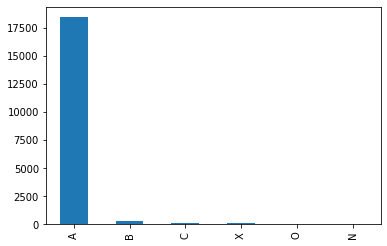

In [ ]:
# visualizing the data based on current grade
df['CURRENT_GRADE'].value_counts().plot.bar() 

The bar plot shows that majority of the data has an A grade which implies that majority of the data is above C grade. It also give us the input of the better conditions the restaurants have in LA. 

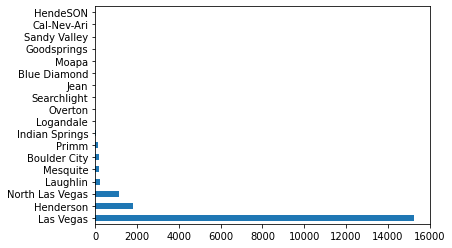

In [ ]:
# visualizing the data based on city 
df['CITY'].value_counts().plot(kind = 'barh')

The Majority of cleaned data comes from Las Vegas with small amount form other cities. It is great as we are taking the survey of Metrapolitan Las Vegas. 

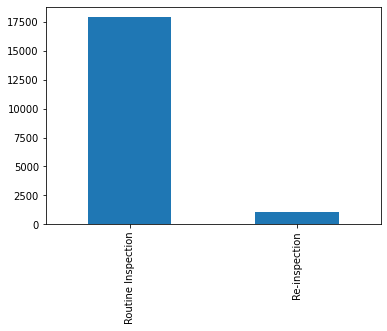

In [ ]:
# visualizing the data based on inspection type
df['INSPECTION_TYPE'].value_counts().plot(kind = 'bar')

Majority of inspection are Routing inspection. Only small quantities of restaurants require Re-inspection. So most of the data is from the first inspection done wiht no need for the second survey. 

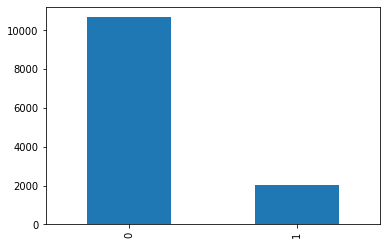

In [ ]:
# visualizing the target variable
df[df['type']=='train']['NEXT_INSPECTION_GRADE_C_OR_BELOW'].value_counts().plot(kind = 'bar')

We can see that most have target variable 0.<br>
Though this is good in the sense that most restaurants are expected to have better than C grade. we have imbalanced data!!!

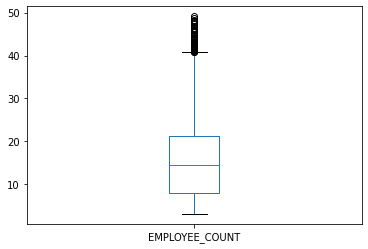

In [ ]:
df.plot(y = 'EMPLOYEE_COUNT', kind = 'box')

The box plot shows that the median count of employee data. Even if we have reduced the range of the employee count range to 50 there are still a lot of employee count tuples that look like outliers.

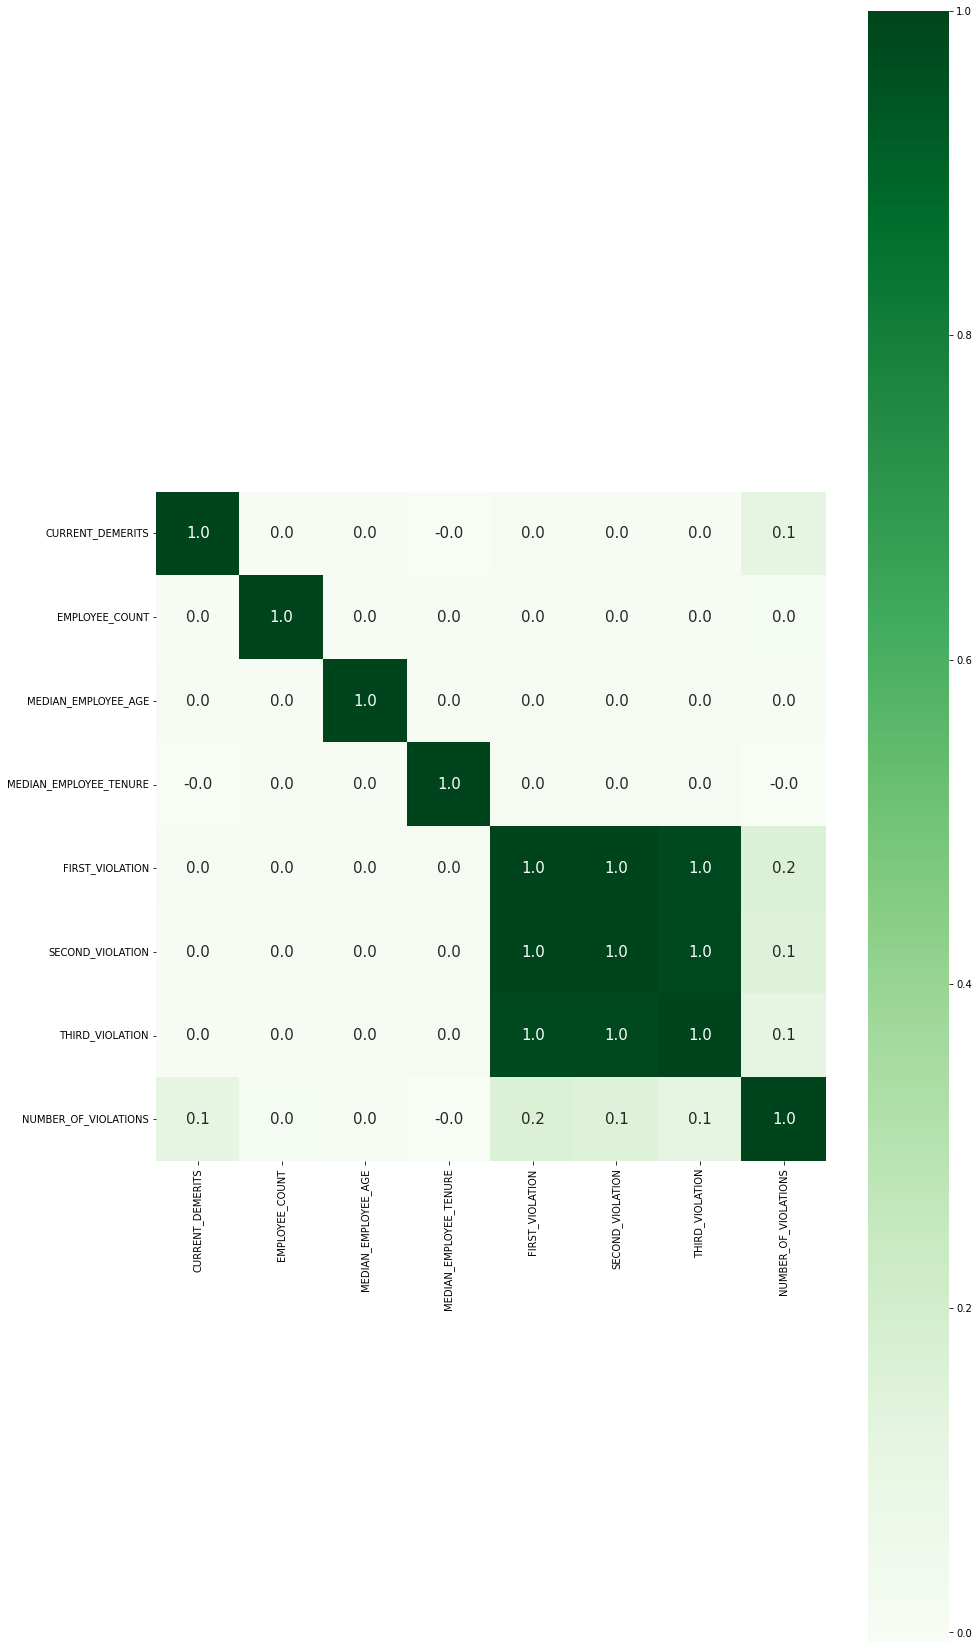

In [ ]:
corr = df.corr()
corr.shape

plt.figure(figsize=(15,30))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

Here we have made a correlation matrix to find if any features are correlated to each other. The matrix shows that first violation, second violation and third violation are fully positively correlated with each other and there is a little bit of positive correlation between first violation and the number of violations.

# preprocessing the variables for the model training

Now we are doing other preprocessing steps-

1.   one-hot encoding
2.   label encoding
3.   Removing columns in test and train data that we don't need for training
4. Removing the dummy columns that we added during the initial preprocessing steps to the testing data
5. After this we form 3 sets of data. 
* Orignal unsampled unbalanced data 
*   Oversampled Data
*   Undersampled Data







In [ ]:
# dealing with ordinal features
grade_dict = {'N':1,'O':2,'X':3,'C':4,'B':5,'A':6}
df1['CURRENT_GRADE'] = df1.CURRENT_GRADE.map(grade_dict)

In [ ]:
# dealing with nominal features using one hot encoding
for i in nominal_features:
  encoded = pd.get_dummies(df1[i], prefix = i, drop_first= False)
  df1 = pd.concat([df1,encoded],axis = 1)
# removing the string counterpart of one hot encoded variables
for i in nominal_features:
  df1.drop(i,axis = 1, inplace= True)

In [ ]:
# adding the new numerical features to the new table
for i in numerical_features:
  df1.drop(i, axis=1, inplace=True)
for i in continuous_features:
  df1.drop(i, axis=1, inplace=True)
df1 = pd.concat([df1,normData],axis = 1)

In [ ]:
# seperating the testing and training data
df_train = df1[df1['type'] == 'train']
df_test = df1[df1['type']== 'test']
# deleting the dummy columns
df_train.drop('type',axis = 1, inplace =  True)
df_test.drop('type',axis = 1, inplace = True)
df_train.drop('RESTAURANT_SERIAL_NUMBER',axis = 1, inplace =  True)
predictions_df = df_test['RESTAURANT_SERIAL_NUMBER']
df_test.drop('RESTAURANT_SERIAL_NUMBER',axis = 1, inplace = True)
df_test.drop('NEXT_INSPECTION_GRADE_C_OR_BELOW',axis = 1, inplace=True)
df_train_features = df_train.loc[:, df_train.columns != 'NEXT_INSPECTION_GRADE_C_OR_BELOW']
df_train_labels = df_train['NEXT_INSPECTION_GRADE_C_OR_BELOW']

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


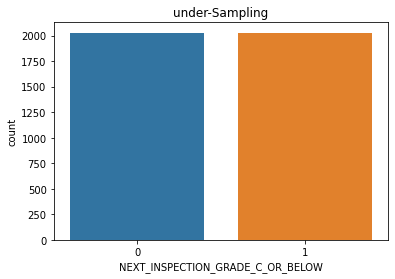

In [ ]:
# using undersampling strategy to balance the data
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
df2_train_features, df2_train_labels = rus.fit_resample(df_train_features, df_train_labels)
sns.countplot(df2_train_labels).set_title('under-Sampling')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


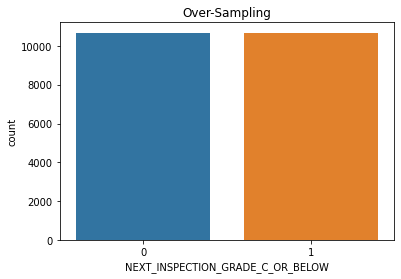

In [ ]:
# using oversampling strategy to amplify the data
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
df1_train_features, df1_train_labels = oversample.fit_resample(df_train_features, df_train_labels)
sns.countplot(df1_train_labels).set_title('Over-Sampling')
plt.show()

In [ ]:
df1.columns

Index(['RESTAURANT_SERIAL_NUMBER', 'CURRENT_GRADE',
       'NEXT_INSPECTION_GRADE_C_OR_BELOW', 'type',
       'RESTAURANT_CATEGORY_Bakery Sales',
       'RESTAURANT_CATEGORY_Banquet Kitchen',
       'RESTAURANT_CATEGORY_Banquet Support',
       'RESTAURANT_CATEGORY_Bar / Tavern', 'RESTAURANT_CATEGORY_Barbeque',
       'RESTAURANT_CATEGORY_Beer Bar', 'RESTAURANT_CATEGORY_Buffet',
       'RESTAURANT_CATEGORY_Caterer', 'RESTAURANT_CATEGORY_Childcare Kitchens',
       'RESTAURANT_CATEGORY_Concessions', 'RESTAURANT_CATEGORY_Confection',
       'RESTAURANT_CATEGORY_Elementary School Kitchen',
       'RESTAURANT_CATEGORY_Farmers Market',
       'RESTAURANT_CATEGORY_Food Trucks / Mobile Vendor',
       'RESTAURANT_CATEGORY_Garde Manger',
       'RESTAURANT_CATEGORY_Grocery Store Sampling',
       'RESTAURANT_CATEGORY_Institutional Food Service',
       'RESTAURANT_CATEGORY_Kitchen Bakery',
       'RESTAURANT_CATEGORY_Main Kitchen',
       'RESTAURANT_CATEGORY_Meat/Poultry/Seafood',
       'RES

In [ ]:
 # train testing split for the unbalanced data
 from sklearn.model_selection import train_test_split
 X_train, y_train,X_test,y_test = train_test_split(df_train_features,df_train_labels,test_size=0.25)

# implementing the machine learning models

## using unbalanced data

In [ ]:
# function to plot k neighbor accuracy graph
def plot_neighbors_accuracy(X_train,X_test,y_train,y_test):
  accuracy_list = []
  for i in range(2,20):
    neigh = KNeighborsClassifier(n_neighbors = i)
    neigh.fit(X_train,X_test)
    pred = neigh.predict(y_train)
    acc = accuracy_score(y_test,pred)
    accuracy_list.append(acc)
  a = np.arange(2,20)
  plt.plot(a,accuracy_list)
  plt.title('accuracy')
  plt.xlabel('number of neighbors')
  plt.ylabel('accuracy')
  plt.show()

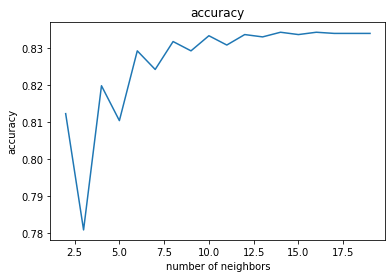

In [ ]:
plot_neighbors_accuracy(X_train,X_test,y_train,y_test)

Link the k nearest neighbor classifier gets one of its highest value at k = 13.

In [ ]:
# function to train different machine learning models 
def machine_learning_classifiers(X_train, X_test, y_train, y_test,k):
  classifiers = [KNeighborsClassifier(n_neighbors = k),
                 SVC(kernel = 'linear',C = 0.025),
                 svm.SVC(gamma = 2, C = 1),
                 RandomForestClassifier(random_state = 32),
                 DecisionTreeClassifier(random_state = 32,max_depth=12),
                 MLPClassifier(alpha = 1, max_iter = 10),
                 AdaBoostClassifier(random_state = 32),
                 QuadraticDiscriminantAnalysis(),
                 GaussianNB(),
                 LogisticRegression(random_state=32)]

  clf_name = ['K nearest Neighbors',
              'Linear SVM',
              'RBF SVM',
              'Random Forest Classifier',
              'Decision tree Classifier',
              'Neural network',
              'AdaBoost',
              'Quadratic Discriminative Analysis',
              'Naive Bayes',
              'Logistic Regression']
  accuracy_dict = {}
  for clf,name in zip(classifiers,clf_name):
    clf.fit(X_train,X_test)
    pred = clf.predict(y_train)
    rep = classification_report(y_test,pred)
    mat = confusion_matrix(y_test,pred)
    accuracy_dict[name] = accuracy_score(y_test,pred)
    print(name)
    print(rep)
    print(mat)
  from sklearn.ensemble import StackingClassifier
  level0 = list()
  level0.append(('rf',RandomForestClassifier()))
  level0.append(('lr', LogisticRegression()))
  level0.append(('knn', KNeighborsClassifier()))
  level0.append(('svm', SVC()))
  level0.append(('bayes', GaussianNB()))
  # define meta learner model
  level1 = RandomForestClassifier()
  # define the stacking ensemble
  clf = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
  # fit the model on all available data
  clf.fit(X_train, X_test)
  print('stacked model')
  pred = clf.predict(y_train)
  rep = classification_report(y_test,pred)
  mat = confusion_matrix(y_test,pred)
  accuracy_dict['stacked model'] = accuracy_score(y_test,pred)
  print(rep)
  print(mat)
  return accuracy_dict

In [ ]:
# Function call for the unbalanced data
accuracy_scores_unbalanced = machine_learning_classifiers(X_train,X_test,y_train,y_test,13)

K nearest Neighbors
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2650
           1       0.30      0.01      0.01       526

    accuracy                           0.83      3176
   macro avg       0.57      0.50      0.46      3176
weighted avg       0.75      0.83      0.76      3176

[[2643    7]
 [ 523    3]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Linear SVM
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2650
           1       0.00      0.00      0.00       526

    accuracy                           0.83      3176
   macro avg       0.42      0.50      0.45      3176
weighted avg       0.70      0.83      0.76      3176

[[2650    0]
 [ 526    0]]
RBF SVM
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2650
           1       0.00      0.00      0.00       526

    accuracy                           0.83      3176
   macro avg       0.42      0.50      0.45      3176
weighted avg       0.70      0.83      0.76      3176

[[2646    4]
 [ 526    0]]
Random Forest Classifier
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2650
           1       0.08      0.00      0.00       526

    accuracy                           0.83      3176
   macro avg       0.46      0

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and 

Neural network
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2650
           1       0.00      0.00      0.00       526

    accuracy                           0.83      3176
   macro avg       0.42      0.50      0.45      3176
weighted avg       0.70      0.83      0.76      3176

[[2650    0]
 [ 526    0]]
AdaBoost
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2650
           1       0.50      0.02      0.03       526

    accuracy                           0.83      3176
   macro avg       0.67      0.51      0.47      3176
weighted avg       0.78      0.83      0.76      3176

[[2642    8]
 [ 518    8]]


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Quadratic Discriminative Analysis
              precision    recall  f1-score   support

           0       0.82      0.01      0.02      2650
           1       0.17      0.99      0.28       526

    accuracy                           0.17      3176
   macro avg       0.49      0.50      0.15      3176
weighted avg       0.71      0.17      0.07      3176

[[  32 2618]
 [   7  519]]
Naive Bayes
              precision    recall  f1-score   support

           0       0.82      0.02      0.03      2650
           1       0.17      0.98      0.28       526

    accuracy                           0.18      3176
   macro avg       0.49      0.50      0.16      3176
weighted avg       0.71      0.18      0.07      3176

[[  42 2608]
 [   9  517]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0

Logistic Regression
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2650
           1       0.00      0.00      0.00       526

    accuracy                           0.83      3176
   macro avg       0.42      0.50      0.45      3176
weighted avg       0.70      0.83      0.76      3176

[[2650    0]
 [ 526    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


stacked model
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      2650
           1       0.19      0.02      0.03       526

    accuracy                           0.83      3176
   macro avg       0.51      0.50      0.47      3176
weighted avg       0.73      0.83      0.76      3176

[[2615   35]
 [ 518    8]]


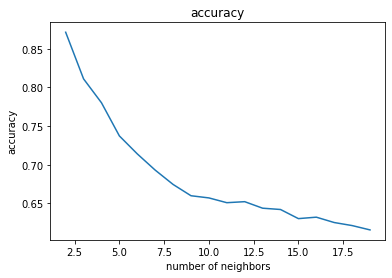

K nearest Neighbors
              precision    recall  f1-score   support

           0       0.93      0.68      0.78      2679
           1       0.74      0.94      0.83      2659

    accuracy                           0.81      5338
   macro avg       0.83      0.81      0.81      5338
weighted avg       0.84      0.81      0.81      5338

[[1817  862]
 [ 147 2512]]
Linear SVM
              precision    recall  f1-score   support

           0       0.57      0.41      0.48      2679
           1       0.53      0.68      0.60      2659

    accuracy                           0.55      5338
   macro avg       0.55      0.55      0.54      5338
weighted avg       0.55      0.55      0.54      5338

[[1100 1579]
 [ 846 1813]]
RBF SVM
              precision    recall  f1-score   support

           0       0.68      0.59      0.63      2679
           1       0.64      0.72      0.68      2659

    accuracy                           0.66      5338
   macro avg       0.66      0.66  

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Neural network
              precision    recall  f1-score   support

           0       0.56      0.53      0.55      2679
           1       0.55      0.57      0.56      2659

    accuracy                           0.55      5338
   macro avg       0.55      0.55      0.55      5338
weighted avg       0.55      0.55      0.55      5338

[[1429 1250]
 [1131 1528]]
AdaBoost
              precision    recall  f1-score   support

           0       0.56      0.57      0.57      2679
           1       0.56      0.55      0.55      2659

    accuracy                           0.56      5338
   macro avg       0.56      0.56      0.56      5338
weighted avg       0.56      0.56      0.56      5338

[[1537 1142]
 [1201 1458]]


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Quadratic Discriminative Analysis
              precision    recall  f1-score   support

           0       0.75      0.01      0.02      2679
           1       0.50      1.00      0.67      2659

    accuracy                           0.50      5338
   macro avg       0.62      0.50      0.34      5338
weighted avg       0.63      0.50      0.34      5338

[[  21 2658]
 [   7 2652]]
Naive Bayes
              precision    recall  f1-score   support

           0       0.74      0.02      0.05      2679
           1       0.50      0.99      0.67      2659

    accuracy                           0.51      5338
   macro avg       0.62      0.51      0.36      5338
weighted avg       0.62      0.51      0.35      5338

[[  63 2616]
 [  22 2637]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Logistic Regression
              precision    recall  f1-score   support

           0       0.56      0.54      0.55      2679
           1       0.56      0.58      0.57      2659

    accuracy                           0.56      5338
   macro avg       0.56      0.56      0.56      5338
weighted avg       0.56      0.56      0.56      5338

[[1445 1234]
 [1116 1543]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


stacked model
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2679
           1       1.00      0.98      0.99      2659

    accuracy                           0.99      5338
   macro avg       0.99      0.99      0.99      5338
weighted avg       0.99      0.99      0.99      5338

[[2667   12]
 [  51 2608]]


In [ ]:
# Function Call for oversampled data
X_train, y_train,X_test,y_test = train_test_split(df1_train_features,df1_train_labels,test_size=0.25)
plot_neighbors_accuracy(X_train,X_test,y_train,y_test)
accuracy_scores_oversampled = machine_learning_classifiers(X_train,X_test,y_train,y_test,3)

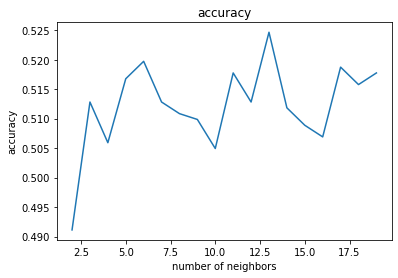

K nearest Neighbors
              precision    recall  f1-score   support

           0       0.49      0.51      0.50       480
           1       0.54      0.53      0.54       534

    accuracy                           0.52      1014
   macro avg       0.52      0.52      0.52      1014
weighted avg       0.52      0.52      0.52      1014

[[243 237]
 [251 283]]
Linear SVM
              precision    recall  f1-score   support

           0       0.55      0.48      0.51       480
           1       0.58      0.65      0.62       534

    accuracy                           0.57      1014
   macro avg       0.57      0.57      0.57      1014
weighted avg       0.57      0.57      0.57      1014

[[230 250]
 [185 349]]
RBF SVM
              precision    recall  f1-score   support

           0       0.51      0.52      0.51       480
           1       0.56      0.56      0.56       534

    accuracy                           0.54      1014
   macro avg       0.54      0.54      0.54

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Neural network
              precision    recall  f1-score   support

           0       0.55      0.54      0.55       480
           1       0.59      0.60      0.60       534

    accuracy                           0.57      1014
   macro avg       0.57      0.57      0.57      1014
weighted avg       0.57      0.57      0.57      1014

[[260 220]
 [212 322]]
AdaBoost
              precision    recall  f1-score   support

           0       0.52      0.65      0.58       480
           1       0.59      0.46      0.52       534

    accuracy                           0.55      1014
   macro avg       0.55      0.55      0.55      1014
weighted avg       0.56      0.55      0.54      1014

[[310 170]
 [288 246]]
Quadratic Discriminative Analysis
              precision    recall  f1-score   support

           0       0.52      0.53      0.53       480
           1       0.57      0.56      0.57       534

    accuracy                           0.55      1014
   macro avg       0.55 

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Logistic Regression
              precision    recall  f1-score   support

           0       0.55      0.59      0.57       480
           1       0.60      0.56      0.58       534

    accuracy                           0.58      1014
   macro avg       0.58      0.58      0.58      1014
weighted avg       0.58      0.58      0.58      1014

[[284 196]
 [234 300]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


stacked model
              precision    recall  f1-score   support

           0       0.49      0.54      0.51       480
           1       0.54      0.49      0.51       534

    accuracy                           0.51      1014
   macro avg       0.51      0.51      0.51      1014
weighted avg       0.51      0.51      0.51      1014

[[259 221]
 [275 259]]


In [ ]:
# Function Call for training Machine Learning Models on undersampled data
X_train, y_train,X_test,y_test = train_test_split(df2_train_features,df2_train_labels,test_size=0.25)
plot_neighbors_accuracy(X_train,X_test,y_train,y_test)
accuracy_scores_undersampled = machine_learning_classifiers(X_train,X_test,y_train,y_test,17)

In [ ]:
# Function to plot the bar graph of all the accuracy
def plot_bar(accuracy_dict):
  keys = list(accuracy_dict.keys())
  values = list(accuracy_dict.values())
  fig, ax = plt.subplots()
  ax.barh(keys, values, align='center')
  plt.xlabel('accuracy')
  plt.ylabel('Model Name')
  plt.title('Accuracy Comparison between different models')
  plt.show()

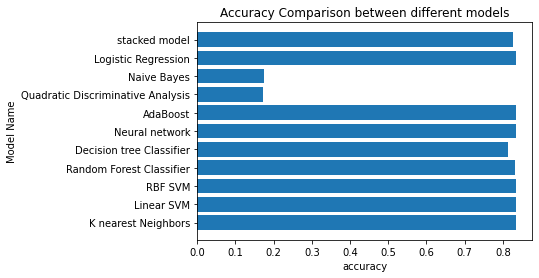

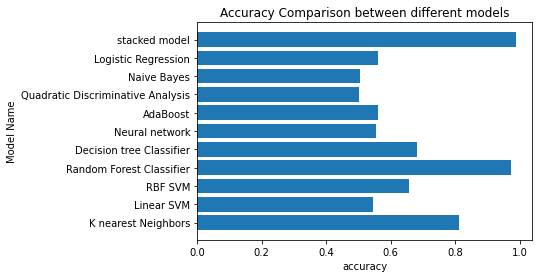

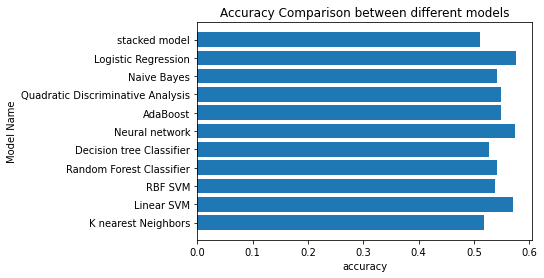

In [ ]:
# Function Call to plot the bar Graph of 
# Unbalanced Data
plot_bar(accuracy_scores_unbalanced)
# oversampled Data
plot_bar(accuracy_scores_oversampled)
# Undersampled Data
plot_bar(accuracy_scores_undersampled)

# using the final model

In [ ]:
# Training the final model( Stacking Classifier ) on oversampled Data
from sklearn.ensemble import StackingClassifier
level0 = list()
level0.append(('rf',RandomForestClassifier()))
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('svm', SVC()))
level0.append(('bayes', GaussianNB()))
# define meta learner model
level1 = RandomForestClassifier()
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
# Splitting the data
X_train,y_train,X_test,y_test = train_test_split(df1_train_features,df1_train_labels)
# fit the model on all available data
model.fit(X_train, X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier()),
                               ('lr', LogisticRegression()),
                               ('knn', KNeighborsClassifier()), ('svm', SVC()),
                               ('bayes', GaussianNB())],
                   final_estimator=RandomForestClassifier())

In [ ]:
# Using metrics on the final model
pred = model.predict(y_train)
rep = classification_report(y_test,pred)
mat = confusion_matrix(y_test,pred)
print(rep)
print(mat)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2666
           1       1.00      0.99      0.99      2672

    accuracy                           0.99      5338
   macro avg       0.99      0.99      0.99      5338
weighted avg       0.99      0.99      0.99      5338

[[2655   11]
 [  39 2633]]


In [ ]:
# getting predictions on the test dataset
CLASSIFIER_PREDICTION = model.predict(df_test)
CLASSIFIER_PROBABILITY = model.predict_proba(df_test)

In [ ]:
# converting to csv
predictions_df = predictions_df.to_frame()
predictions_df['CLASSIFIER_PROBABILITY'] = CLASSIFIER_PROBABILITY.tolist()
predictions_df['CLASSIFIER_PREDICTION'] =  CLASSIFIER_PREDICTION.tolist()
predictions_df['CLASSIFIER_PREDICTION'].value_counts()
predictions_df.to_csv('/content/drive/MyDrive/predictions_Bora_Aashish_Intern.csv',index = False)

# Recommendations

It is quite difficult to build a reliable MVP model based on the data provided. There is lot of missing values and outliers in the data which makes the small dataset even smaller. Apart from this the data is highly imbalanced with around 90% of the target values having 0 as a category. Although I have used oversampling and undersampling techniques to make the balanced there is a lot of noise in that type of training. Thus I do not recommend to build  a MVP model based on the dataset provided.<br>

To solve the problem of skewed data we can try increasing the data of restaurants having class 1. If we can't increase data containing class 1 we can try adding more features. Some of suggestions are 
1. We can try getting some cleaned form of violations raw data as it is hard for machine to interpret the raw violations data. This data could have a high correlation with the NEXT_INSPECTION_GRADE. 
2. We can try getting a data containg when the next inspection is scheduled as the time between the inspection can play significant role in identifying the next grade. If there is not much time difference it is highly unlikely that there is difference in the grade before. 
3. Maybe we can get the foot traffic in the restaurant and number of customers a restaurant has daily can display its image.
4. We can also get a feature like employee leaving and joining the restaurant. Employee satisfaction can display the standard the restaurant follows.
5. Providing some formula to calculate CURRENT GRADE and INSPECTION DEMERITS can mitigate lot of missing data.
6. Some information about the cleanliness of the restaurant could be given as it has a good contribution to the grade of the restaurant. 
7. Information about the average rating of customer reviews could be used to get better predictions
8. Some data could be taken from the online vendors that work in partnership with the restaurant about their satisfaction with the restaurant and used to determine the future grading. 
9. Data about tips recieved monthly could be used. These tips represent of how much a customer is satisfied with the service. 
